Narrative Analytics and Experimentation

- Analysis that highlights your experimental hypothesis:
This is a datset I have used before. It includes 3,811 rows of data regarding kickstarter projects during a 1 month period November-December 2018. The dataset includes information about the number of backers each project received, in addition to the pledged amount. It also includes a column with boolean values with information on whether or not a project was a "staff pick" or featured on the website. My hypothesis is that those that were a staff pick for the month (the treatment group) received more backers and more in pledged amounts than those that were not (the control group) because they were highlighted on the website. As you can see in the exporatory analysis below, there are fewer projects that were staff picks than those that were not. The means for both groups on both variables (backers and pledged amount) seem to be different, with those that are staff picks receiving higher backer counts and pledged amounts. We will check to see if those mean differences are statistically significantly different with an independent samples t test.

- A rollout plan showing how you would implement and rollout the experiment
To roll this out, I will use the data already available in the dataset and conduct the t test without equal variances assumed because of the difference in the size of the two groups (those that were staff picks and those that were not).

- An evaluation plan showing what constitutes success in this experiment
The experiment will be evaluated for success if I was able to successfully test both parts of this hypothesis with the data available in this dataset.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('/Users/roxyallen/Downloads/Kickstarter_2018-12-13T03_20_05_701Z/Kickstarter.csv')

In [3]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,170,A documentary about two circuses in remote cor...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",27455,US,1339525842,"{""id"":1596438170,""name"":""Susan Gray"",""is_regis...",USD,$,True,...,big-top-without-borders,https://www.kickstarter.com/discover/categorie...,True,False,successful,1353256231,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",27455.55,international
1,10,A multi-media IPad book telling the true story...,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",535,US,1351941026,"{""id"":529454320,""name"":""Barb Buresh"",""is_regis...",USD,$,True,...,the-story-of-pweep-from-egg-to-peacock,https://www.kickstarter.com/discover/categorie...,True,False,successful,1355949546,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",535.00,international
2,0,We are college students that get drunk and the...,"{""id"":357,""name"":""Audio"",""slug"":""journalism/au...",0,CA,1415917256,"{""id"":1626740608,""name"":""DC Radio"",""is_registe...",CAD,$,True,...,dc-radio,https://www.kickstarter.com/discover/categorie...,False,False,failed,1418916015,0.886698,"{""web"":{""project"":""https://www.kickstarter.com...",0.00,domestic
3,0,"its Ali bangerz,its time to stand up for other...","{""id"":44,""name"":""World Music"",""slug"":""music/wo...",0,US,1446664703,"{""id"":631293879,""name"":""Ali Bangerz"",""is_regis...",USD,$,True,...,ali-bangerz-two-new-full-lenght-albums,https://www.kickstarter.com/discover/categorie...,False,False,failed,1449345000,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.00,domestic
4,62,A young neuroscientist attempts to reconnect w...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",6705,US,1284003536,"{""id"":1385040366,""name"":""Alexis Gambis (delete...",USD,$,True,...,deja-vu-dissecting-memory-on-camera,https://www.kickstarter.com/discover/categorie...,True,True,successful,1287200724,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",6705.00,international


In [4]:
df.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,3811.000000,3.811000e+03,3.811000e+03,3.811000e+03,3811.000000,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3811.000000,3.811000e+03
mean,167.925216,1.103102e+04,1.414847e+09,1.421211e+09,0.987995,5.056321e+04,1.068813e+09,1.418251e+09,1.190285e+04,1.421027e+09,1.009844,1.104586e+04
std,963.958071,6.703921e+04,6.956082e+07,6.976052e+07,0.173450,7.553509e+05,6.181413e+08,6.988289e+07,6.689274e+04,6.959901e+07,0.206783,6.695454e+04
min,0.000000,0.000000e+00,1.243643e+09,1.245544e+09,0.008813,1.000000e+00,1.852000e+04,1.243658e+09,0.000000e+00,1.245545e+09,0.008786,0.000000e+00
25%,2.000000,3.600000e+01,1.362420e+09,1.371591e+09,1.000000,1.750000e+03,5.325069e+08,1.368624e+09,3.714500e+01,1.371591e+09,1.000000,3.600000e+01
50%,20.000000,1.130000e+03,1.421433e+09,1.427171e+09,1.000000,5.000000e+03,1.063140e+09,1.424280e+09,1.128000e+03,1.426979e+09,1.000000,1.135041e+03
75%,73.000000,5.459500e+03,1.465297e+09,1.471640e+09,1.000000,1.500000e+04,1.604272e+09,1.469129e+09,5.549500e+03,1.471480e+09,1.000000,5.457000e+03
max,25681.000000,2.543373e+06,1.544137e+09,1.549782e+09,1.335850,4.000000e+07,2.146874e+09,1.544598e+09,1.704921e+06,1.544598e+09,1.715893,2.529438e+06


Text(0.5, 1.0, 'Count of Projects that were Staff Picks, or called "Projects We Love"')

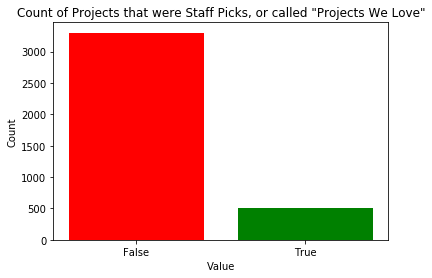

In [5]:
staffpick = df.staff_pick.value_counts().sort_index()
plt.plot(1, 2, 1)
x=['False', 'True']
plt.bar(x, height=staffpick, color=['red', 'green'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of Projects that were Staff Picks, or called "Projects We Love"')

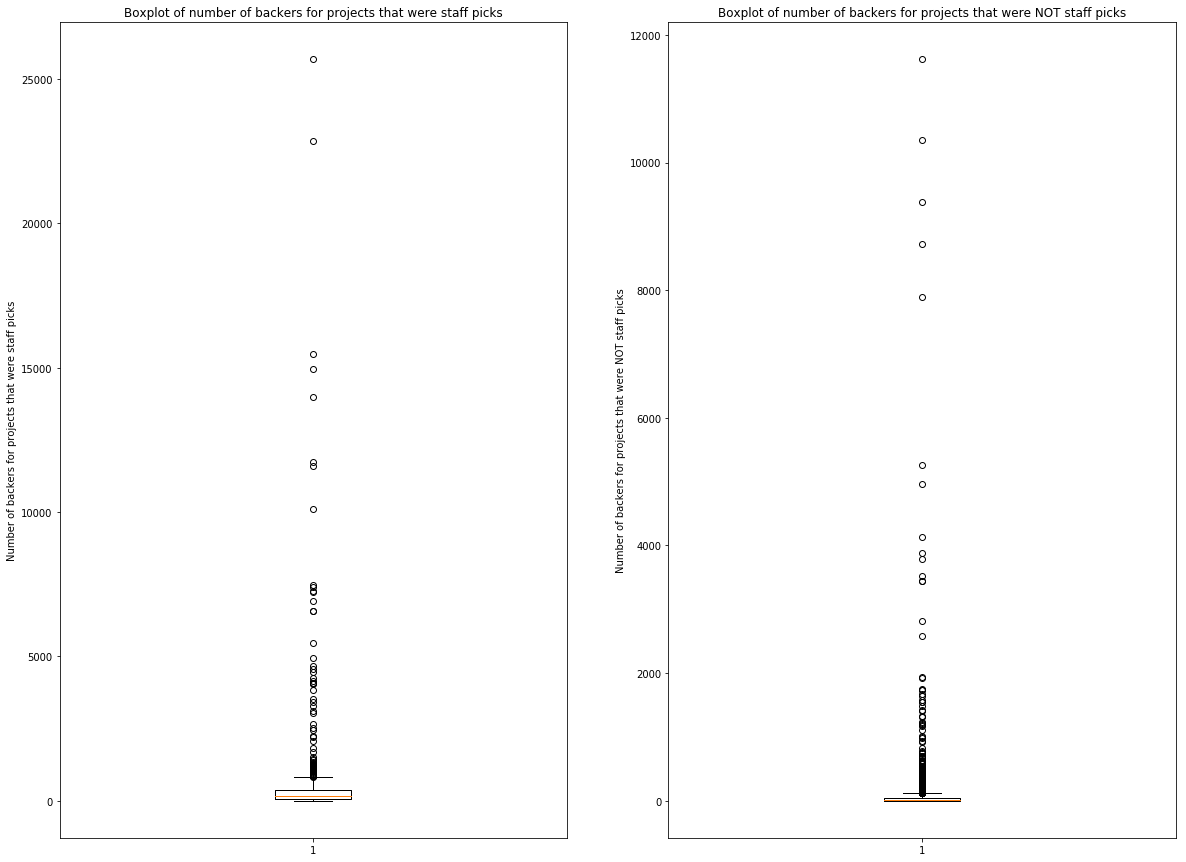

In [30]:
plt.figure(figsize=(20, 15))
x = df[df.staff_pick == True].backers_count
plt.subplot(1, 2, 1)
plt.boxplot(x)
plt.ylabel('Number of backers for projects that were staff picks')
plt.title('Boxplot of number of backers for projects that were staff picks')

y = df[df.staff_pick == False].backers_count
plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('Number of backers for projects that were NOT staff picks')
plt.title('Boxplot of number of backers for projects that were NOT staff picks')
plt.show()

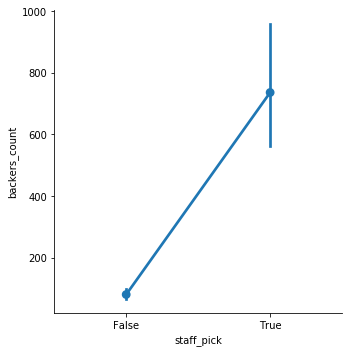

In [32]:
sns.catplot(x="staff_pick", y="backers_count", kind="point", data=df);

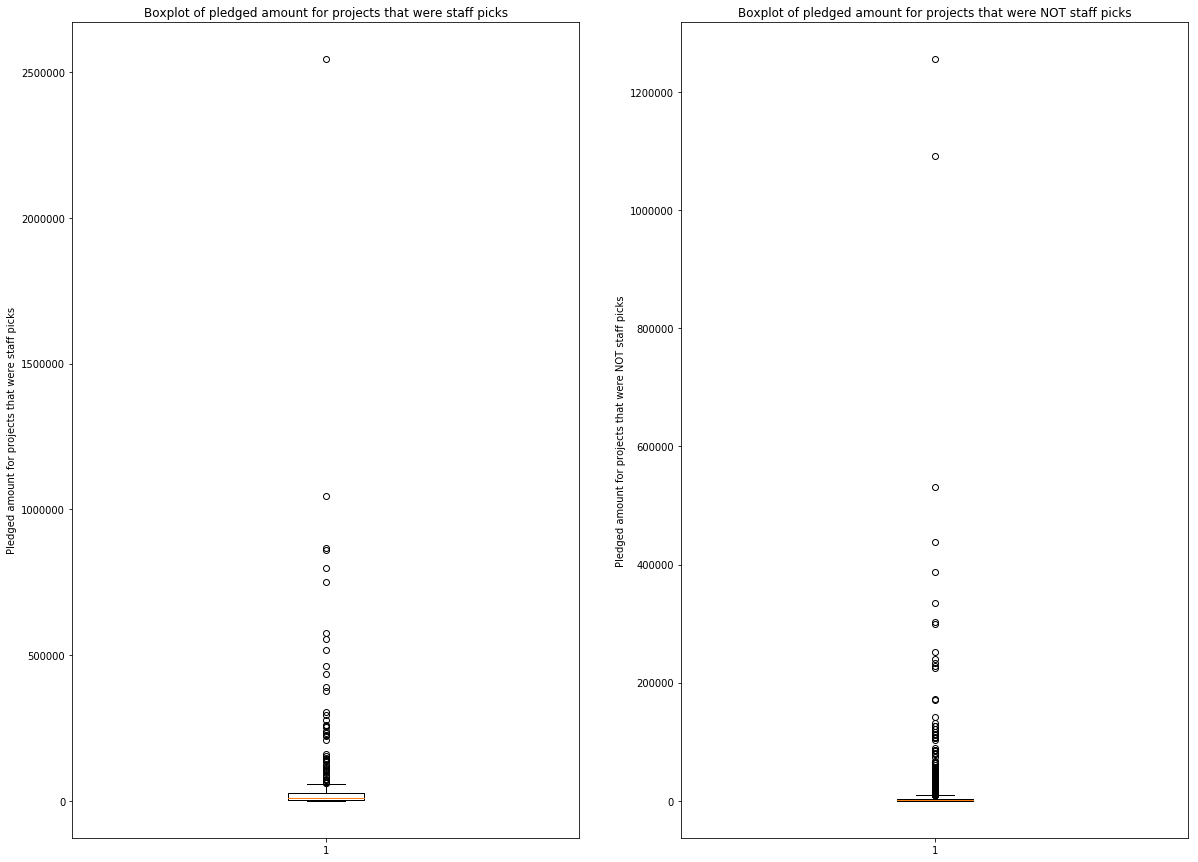

In [34]:
plt.figure(figsize=(20, 15))
x = df[df.staff_pick == True].converted_pledged_amount
plt.subplot(1, 2, 1)
plt.boxplot(x)
plt.ylabel('Pledged amount for projects that were staff picks')
plt.title('Boxplot of pledged amount for projects that were staff picks')

y = df[df.staff_pick == False].converted_pledged_amount
plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('Pledged amount for projects that were NOT staff picks')
plt.title('Boxplot of pledged amount for projects that were NOT staff picks')
plt.show()

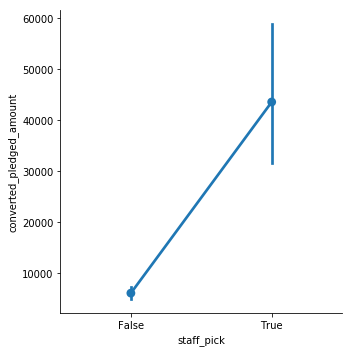

In [35]:
sns.catplot(x="staff_pick", y="converted_pledged_amount", kind="point", data=df);

In [27]:
from scipy.stats import ttest_ind

ttest_ind(df[df.staff_pick == True].backers_count, df[df.staff_pick == False].backers_count, equal_var=False)

Ttest_indResult(statistic=6.424025360722264, pvalue=3.0268579707112155e-10)

In [28]:
ttest_ind(df[df.staff_pick == True].converted_pledged_amount, df[df.staff_pick == False].converted_pledged_amount, equal_var=False)

Ttest_indResult(statistic=5.4452203328707105, pvalue=8.012023406514747e-08)

As you can see, there is 1) a statistically significant difference in regard to the count of backers for those projects that were staff picks versus those that were not, and 2) a statistically significant difference in regard to the pledged amount for those projects that were staff picks versus those that were not. At p < .05.

The results from this hypothesis test suggest that there are differences between the two groups of those projects that were staff picks and those that weren't in regard to the pledged amount and the number of backers. We can reject our null hypothesis that there is no difference between the groups. 

We should keep in mind that the samples were not randomly chosen for an experiment, so there must be lurking variables. In the future, I would see if projects could be randomly assigned as a staff pick in order to improve the analysis.